# US-Accidents: A Countrywide Traffic Accident Dataset

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset.

 - ID - This is a unique identifier of the accident record.
 - Source - Indicates source of the accident report (i.e. the API which reported the accident.).
 - TMC (Traffic Message Channel) - provides more detailed description of the event.
 - Severity - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
 - Start_Time - Shows start time of the accident in local time zone.
 - End_Time - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
 - Start_Lat - Shows latitude in GPS coordinate of the start point.
 - Start_Lng - Shows longitude in GPS coordinate of the start point.
 - End_Lat - Shows latitude in GPS coordinate of the end point.
 - End_Lng - Shows longitude in GPS coordinate of the end point.
 - Distance(mi) - The length of the road extent affected by the accident.
 - Description - Shows natural language description of the accident.
 - Number - Shows the street number in address field.
 - Street - Shows the street name in address field.
 - Side - Shows the relative side of the street (Right/Left) in address field.
 - City - Shows the city in address field.
 - County - Shows the county in address field.
 - State - Shows the state in address field.
 - Zipcode - Shows the zipcode in address field.
 - Country - Shows the country in address field.
 - Timezone	 - Shows timezone based on the location of the accident (eastern, central, etc.).
 - Airport_Code - Denotes an airport-based weather station which is the closest one to location of the accident.
 - Weather_Timestamp - Shows the time-stamp of weather observation record (in local time).
 - Temperature(F) - Shows the temperature (in Fahrenheit).
 - Wind_Chill(F) - Shows the wind chill (in Fahrenheit).
 - Humidity(%) - Shows the humidity (in percentage).
 - Pressure(in) - Shows the air pressure (in inches).
 - Visibility(mi) - Shows visibility (in miles).
 - Wind_Direction - Shows wind direction.
 - Wind_Speed(mph) - Shows wind speed (in miles per hour).
 - Precipitation(in) - Shows precipitation amount in inches, if there is any.
 - Weather_Condition - Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
 - [Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop] - A POI annotation which indicates presence in a nearby location.
 - Sunrise_Sunset - Shows the period of day (i.e. day or night) based on sunrise/sunset.
 - Civil_Twilight - Shows the period of day (i.e. day or night) based on civil twilight.
 - Nautical_Twilight - Shows the period of day (i.e. day or night) based on nautical twilight.
 - Astronomical_Twilight - Shows the period of day (i.e. day or night) based on astronomical twilight.

## Data preparation and preprocessing

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [23]:
pd.set_option('display.max_rows', 10)

In [24]:
#import dataset

df = pd.read_csv('US_Accidents_June20.csv', parse_dates = True)
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


- 49 columns 
- 3.5 million rows/accidents

### Datetime format

In [28]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df["YMD"] = df["Start_Time"].dt.date

### Feature types

In [29]:
# df.info()

In [30]:
numerical_features = ['Start_Lat','Start_Lng','Distance(mi)','Temperature(F)',
                     'Humidity(%)', 'Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)'] 

binary_features = ['Amenity', 'Bump', 'Crossing','Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
                   'Station','Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop','Sunrise_Sunset']

categorical_features = ['Street', 'Side', 'City', 'County', 'State','Country', 'Timezone','Weather_Condition',
                       'Month', 'Year', 'Hour', 'Weekday', 'Day']

In [41]:
for i in df.columns:
    print(i, df[i].unique().size)

Source 3
Severity 4
Start_Time 3200042
End_Time 3246120
Start_Lat 1124695
Start_Lng 1113407
End_Lat 375075
End_Lng 383570
Distance(mi) 13476
Number 40366
Side 3
State 49
Timezone 5
Temperature(F) 832
Humidity(%) 101
Pressure(in) 1023
Visibility(mi) 86
Wind_Direction 25
Wind_Speed(mph) 161
Precipitation(in) 262
Weather_Condition 128
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3
Year 5
Month 12
Day 31
Hour 24
Weekday 7
YMD 1601


### Useless features

In [31]:
df = df.drop(['Country', 'Turning_Loop', 'ID', 'TMC', 'Description', 'Street', 'City', 'County', 'Zipcode', 
              'Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)'], axis = 1)

 - ID - id of each accident 
 - Country - only for USA
 - Turning_Loop - only one unique value
 - TMC - detailed description of the accident
 - Description - description of the event
 - Street, City, County - we will consider at the level of the state
 - Zipcode 
 - Airport_Code
 - Weather_Timestamp
 - Wind_Chill(F)

### Missing values

In [43]:
df.isna().sum()

Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Number                   2262864
Side                           0
State                          0
Timezone                    3880
Temperature(F)             65732
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitation(in)        2025874
Weather_Condition          76138
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop      

In [44]:
#Missing values percentage
missing = pd.DataFrame(df.isnull().sum().reset_index())
missing.columns = ['Feature', 'Percentage']
missing['Percentage'] = missing['Percentage'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Percentage']>0,:]

,Feature,Percentage
6,End_Lat,70.548896
7,End_Lng,70.548896
9,Number,64.402694
12,Timezone,0.110428
13,Temperature(F),1.870779
14,Humidity(%),1.983341
15,Pressure(in),1.590441
16,Visibility(mi),2.158915
17,Wind_Direction,1.675595
18,Wind_Speed(mph),12.938490


In [46]:
df = df.dropna()
df

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,YMD
2478862,Bing,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,...,Night,Day,Day,Day,2016,2,9,18,1,2016-02-09
2478863,Bing,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,...,Night,Day,Day,Day,2016,2,9,18,1,2016-02-09
2478867,Bing,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,...,Night,Night,Night,Day,2016,2,10,6,2,2016-02-10
2478870,Bing,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,...,Day,Day,Day,Day,2016,2,10,8,2,2016-02-10
2478887,Bing,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,...,Day,Day,Day,Day,2016,2,10,12,2,2016-02-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513573,Bing,3,2019-08-23 16:19:21,2019-08-23 16:48:04,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,...,Day,Day,Day,Day,2019,8,23,16,4,2019-08-23
3513577,Bing,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.003170,-121.662679,0.708,3044.0,...,Day,Day,Day,Day,2019,8,23,17,4,2019-08-23
3513578,Bing,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.995930,-121.672020,0.708,2500.0,...,Day,Day,Day,Day,2019,8,23,17,4,2019-08-23
3513579,Bing,3,2019-08-23 01:16:01,2019-08-23 01:44:53,34.121320,-117.254540,34.121320,-117.254540,0.000,1498.0,...,Night,Night,Night,Night,2019,8,23,1,4,2019-08-23


- clean dataset

## Plots and interpretations 

In [52]:
df.nunique()

Source                        1
Severity                      4
Start_Time               128680
End_Time                 133293
Start_Lat                 82269
Start_Lng                 82764
End_Lat                   83020
End_Lng                   83664
Distance(mi)               3356
Number                    25558
Side                          2
State                        49
Timezone                      4
Temperature(F)              370
Humidity(%)                 100
Pressure(in)                863
Visibility(mi)               45
Wind_Direction               23
Wind_Speed(mph)              77
Precipitation(in)           103
Weather_Condition            71
Amenity                       2
Bump                          2
Crossing                      2
Give_Way                      2
Junction                      2
No_Exit                       2
Railway                       2
Roundabout                    2
Station                       2
Stop                          2
Traffic_

In [68]:
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Number of Accidents by Timezones')

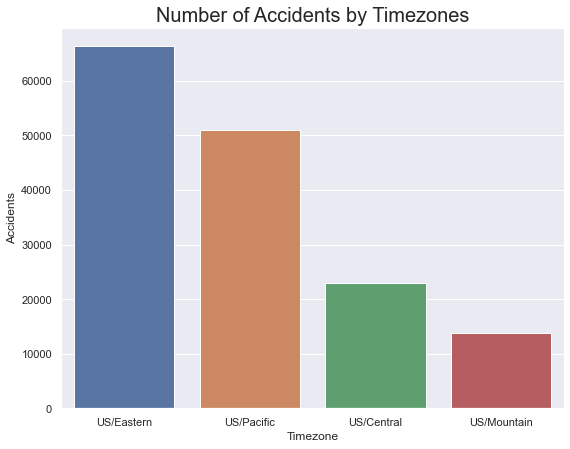

In [70]:
counts = df['Timezone'].value_counts()

sns.set(rc={'figure.figsize':(9,7)})
ax = sns.barplot(x=df.Timezone.unique(), y= counts, data=df);
ax.set(xlabel = 'Timezone', ylabel = 'Accidents')
ax.set_title('Number of Accidents by Timezones', fontsize=20)

- Highest number of accidents happen in US/Eastern Timezone
- Lowest number of accidents happen in US/Mountain Timezone

Text(0.5, 1.0, 'US Traffic Accidents by State')

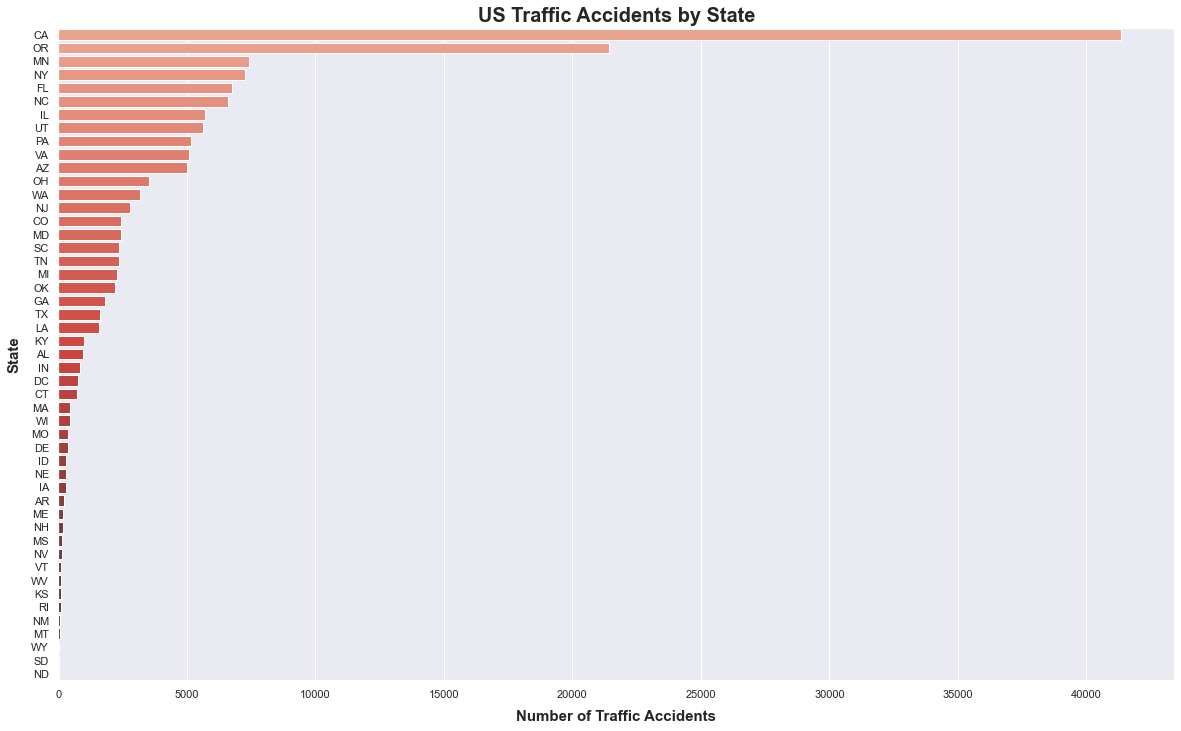

In [71]:
plt.figure(figsize=(20,12))
states = sns.countplot(y = 'State', data = df, order = df['State'].value_counts().index, palette='Reds_d')
plt.ylabel("State", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Number of Traffic Accidents', labelpad=10,fontsize=15, weight='bold')
plt.title('US Traffic Accidents by State',fontsize=20, weight='bold')